In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pokemon import PokemonFactory, StatusEffect
from catching import attempt_catch

In [3]:
factory = PokemonFactory("pokemon.json")

<h1>Preguntas Guı́a <h1>

<h2>1. Acerca de pokebolas:<h2>
<h3>a) Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola? <h3>

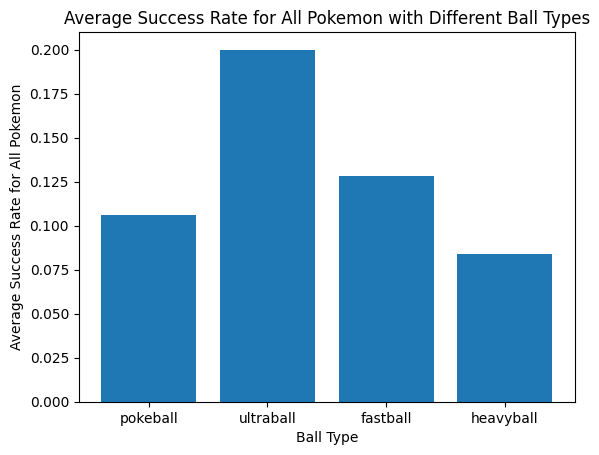

In [1]:
from pokemon import PokemonFactory, StatusEffect
from catching import attempt_catch

factory = PokemonFactory("pokemon.json")
num_attempts = 100
noise_level = 0.15

pokemonName_list = ["snorlax", "jolteon", "caterpie", "onix", "mewtwo"]
ball_types = ['pokeball', 'ultraball', 'fastball' , 'heavyball']

# Create a nested dictionary to store success rates for all pokemon and all ball types
success_rates_dict = {pokemon: {ball_type: [] for ball_type in ball_types} for pokemon in pokemonName_list}

# Loop for each pokemon
for pokemon_name in pokemonName_list:
    pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, 1)
    for ball_type in ball_types:
        success_count = 0
        for _ in range(num_attempts):
            attempt_result, capture_rate = attempt_catch(pokemon, ball_type, noise_level)
            if attempt_result:
                success_count += 1
        success_rate = success_count / num_attempts
        # Append the success rate to the appropriate list in the nested dictionary
        success_rates_dict[pokemon_name][ball_type].append(success_rate)


# Calculate the average success rate for each pokemon and each ball type
average_success_rates = {pokemon: {ball_type: sum(success_rates) / len(success_rates) for ball_type, success_rates in rates.items()} for pokemon, rates in success_rates_dict.items()}
# Calculate the average success rate for all pokemons for each ball type
average_success_rates_all_pokemon = {ball_type: sum([rates[ball_type] for pokemon, rates in average_success_rates.items()])/len(pokemonName_list) for ball_type in ball_types}

plt.figure()
plt.bar(average_success_rates_all_pokemon.keys(), average_success_rates_all_pokemon.values())
plt.xlabel('Ball Type')
plt.ylabel('Average Success Rate for All Pokemon')
plt.title('Average Success Rate for All Pokemon with Different Ball Types')
plt.show()


<h3> b) ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrı́nsecas de cada Pokemon? <h3>

Como se puede ver en los graficos abajo hay pokebolas que son mas efectivas con unos pokemons. Por ejemplo Mewto solo se puede atrapar con una fastball, mientras es mas efectivo atrapar Snorlax o Caterpie con ultraballs.



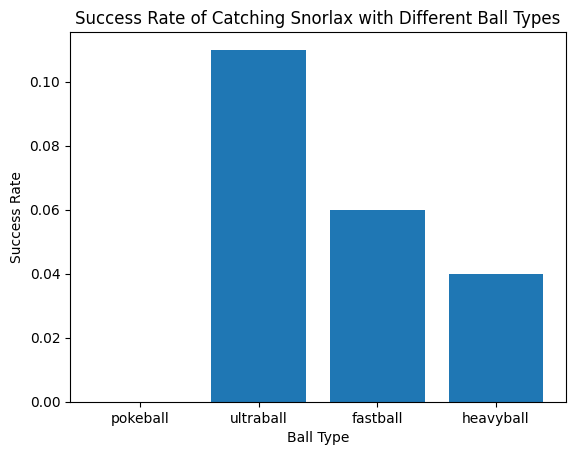

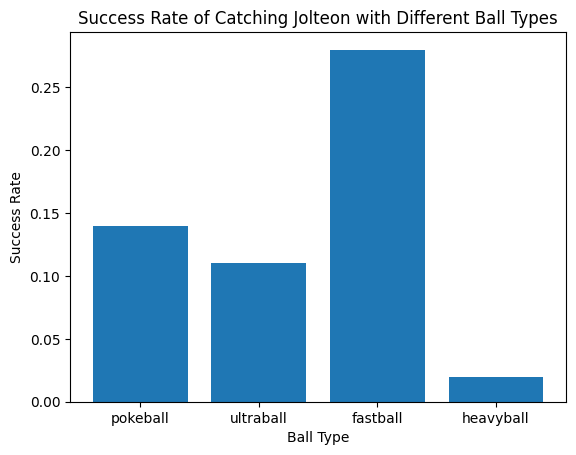

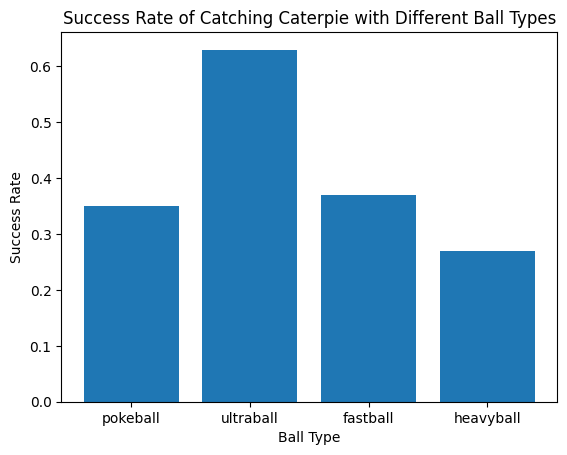

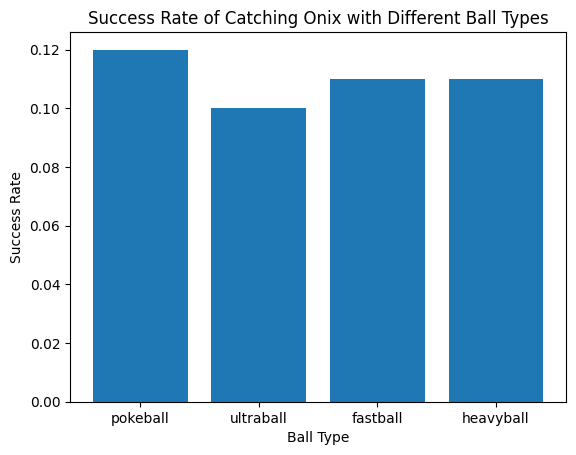

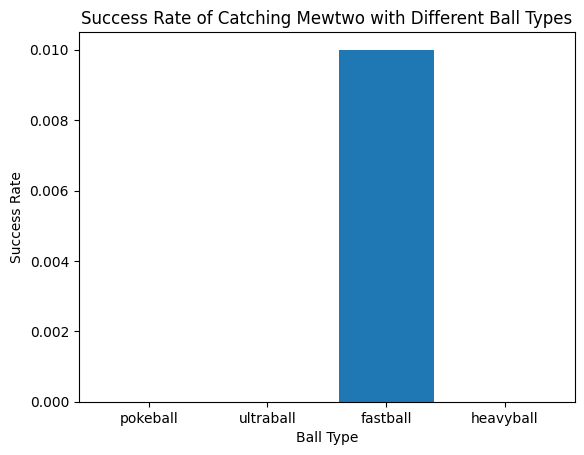

In [3]:
for pokemon, rates in average_success_rates.items():
    plt.figure()
    plt.bar(rates.keys(), rates.values())
    plt.xlabel('Ball Type')
    plt.ylabel('Success Rate')
    plt.title(f'Success Rate of Catching {pokemon.capitalize()} with Different Ball Types')
    plt.show()

<h2>2. Acerca del estado del Pokemon:<h2>
<h3>a) ¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es ası́, ¿Cuál es más o menos efectiva?<h3>

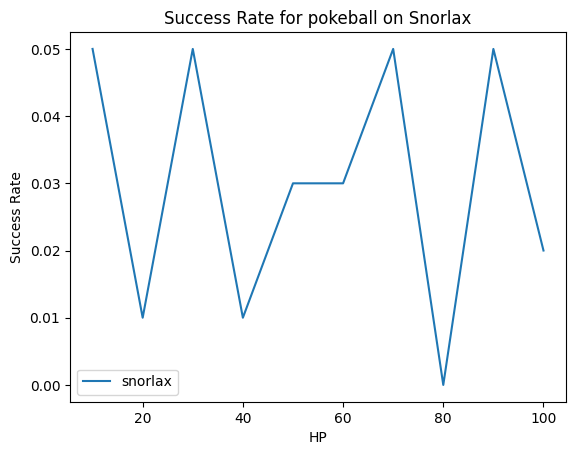

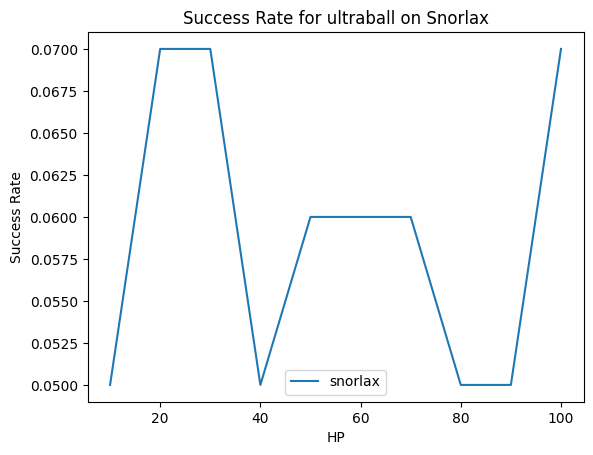

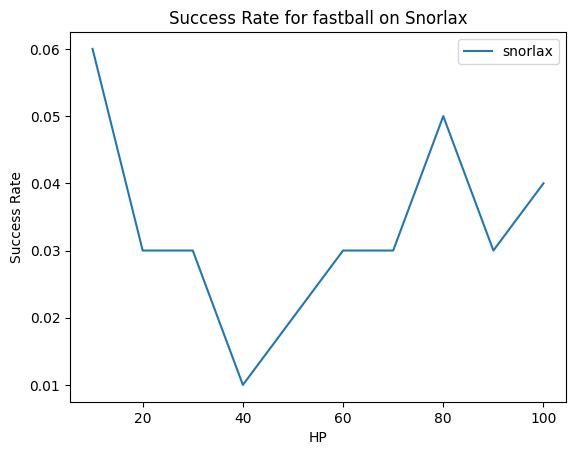

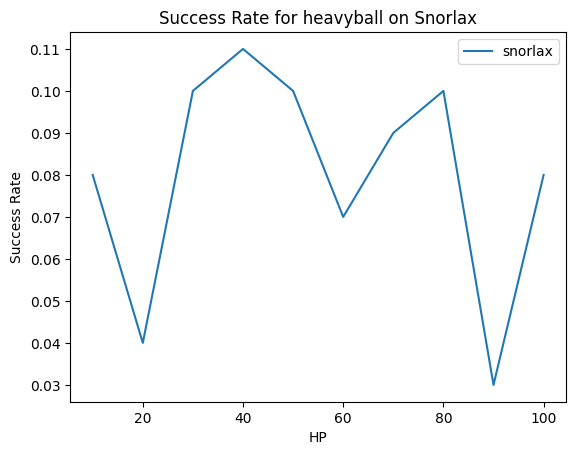

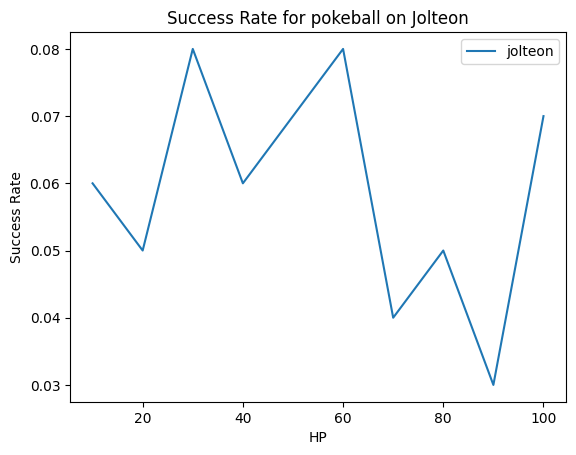

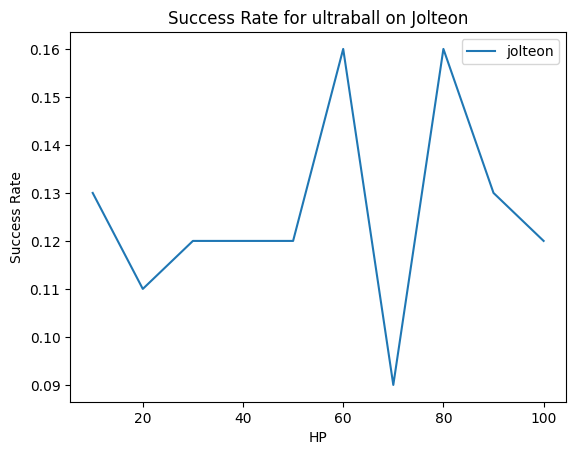

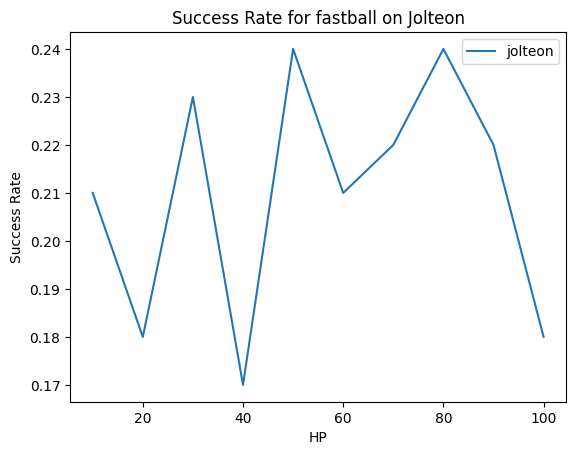

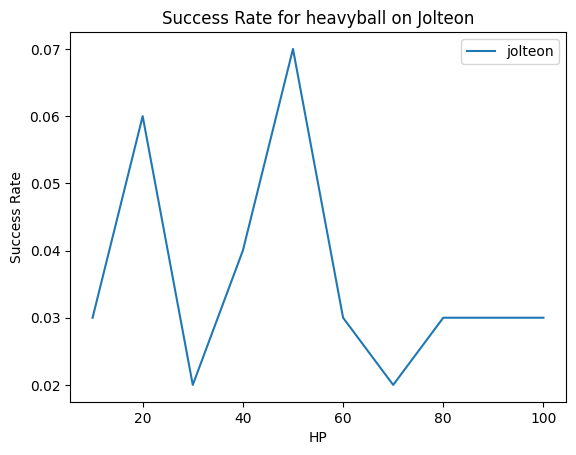

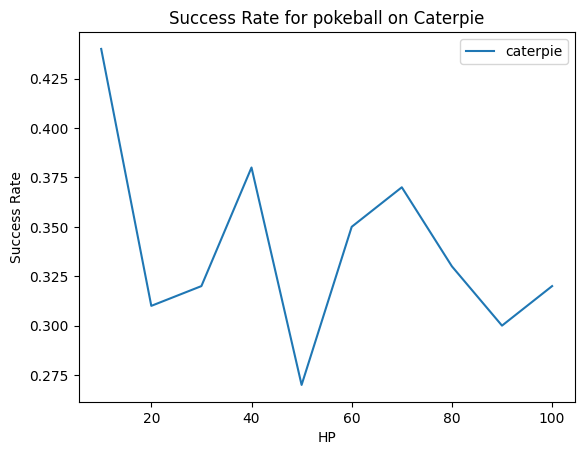

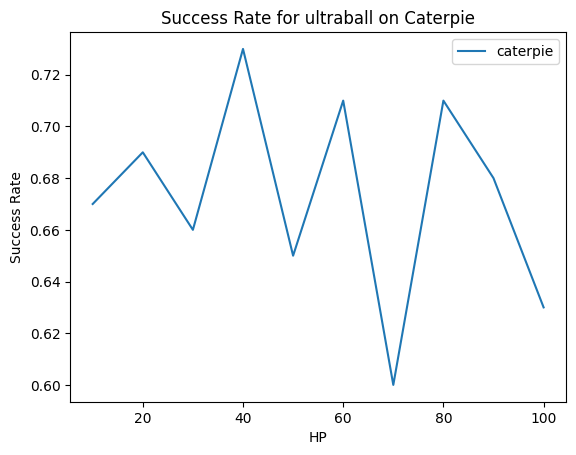

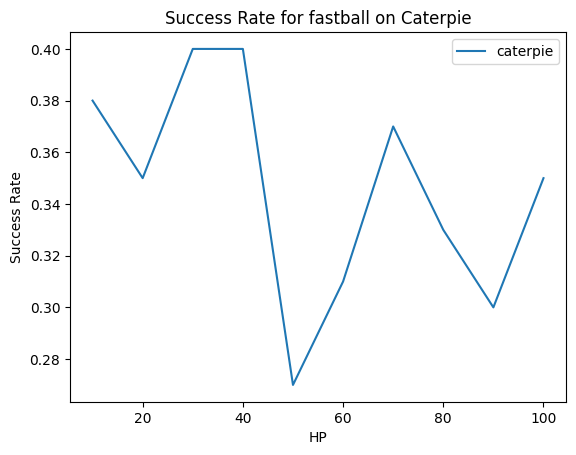

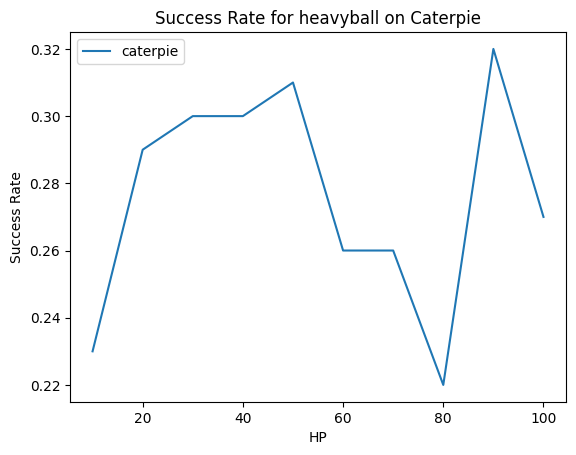

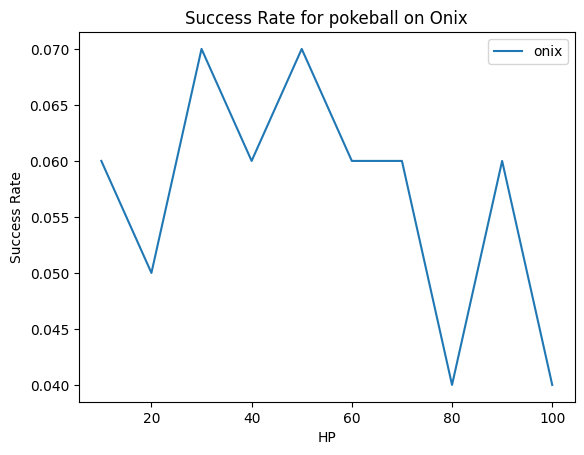

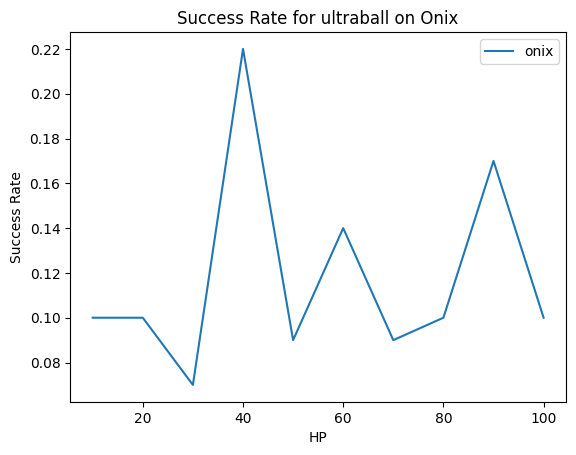

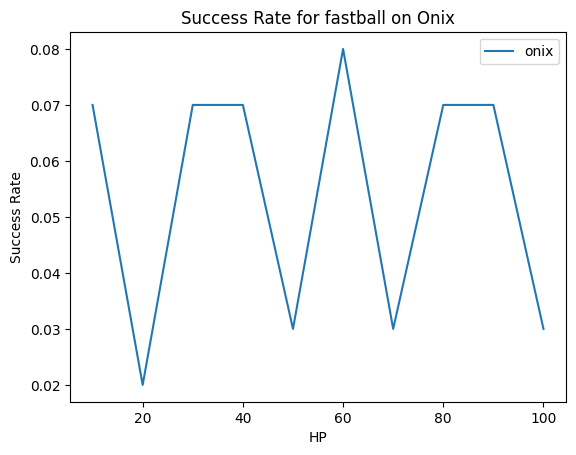

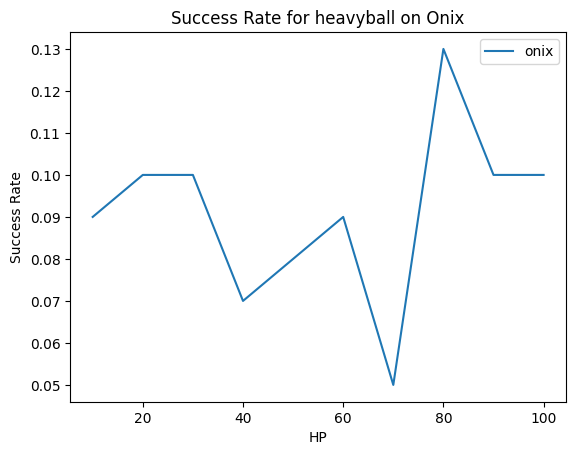

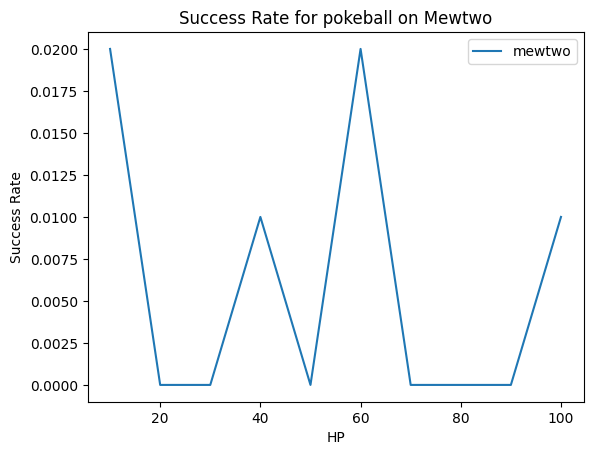

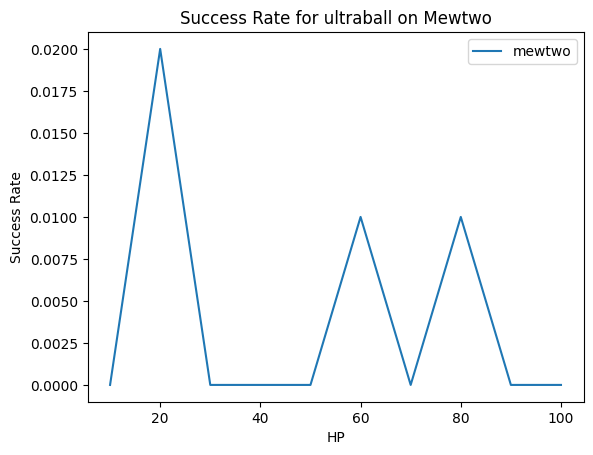

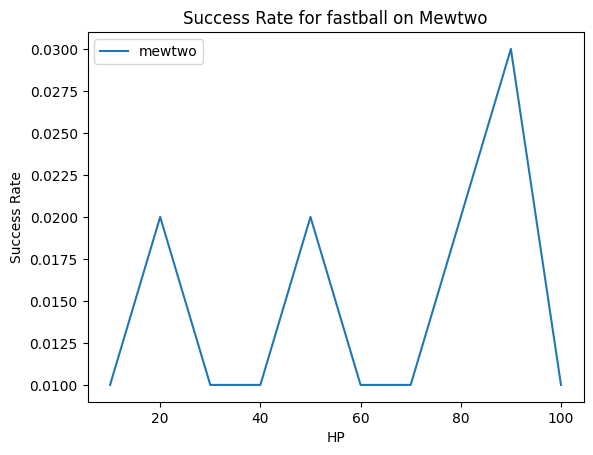

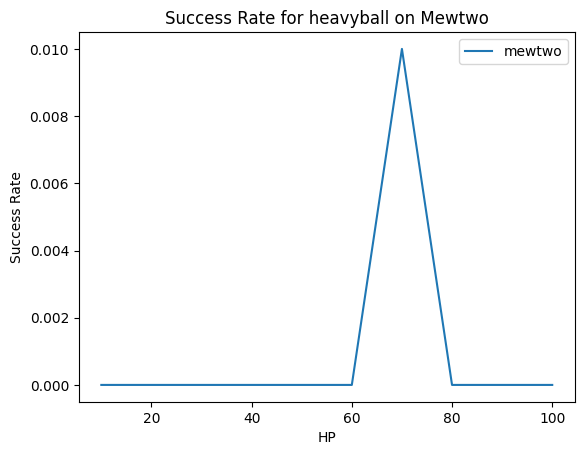

In [7]:
for pokemon_name in pokemonName_list:
    for ball_type in ball_types:
        # Initialize lists to store HP and success rate data for this pokemon and ball type
        hp_list = []
        success_rate_list = []

        # Loop over HP values from 10 to 100 with step size 10
        for hp in range(10, 101, 10):
            pokemon = factory.create(pokemon_name, hp, StatusEffect.NONE, 1)
            success_count = 0
            for _ in range(num_attempts):
                attempt_result, capture_rate = attempt_catch(pokemon, ball_type, noise_level)
                if attempt_result:
                    success_count += 1
            success_rate = success_count / num_attempts
            hp_list.append(hp)
            success_rate_list.append(success_rate)

        # Plot the success rates for this pokemon and ball type
        plt.plot(hp_list, success_rate_list, label=pokemon_name)
        plt.xlabel('HP')
        plt.ylabel('Success Rate')
        plt.title(f'Success Rate for {ball_type} on {pokemon.name.capitalize()}')
        plt.legend()
        plt.show()

### b) ¿Como afectan los puntos de vida a la efectividad de la captura?
Sugerencia: Elegir uno o dos Pokemones y manteniendo el resto de los parametros
constantes, calcular la probabilidad de captura para distintos HP %

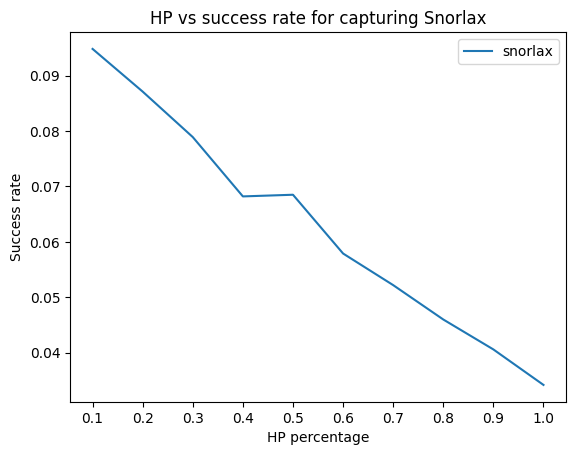

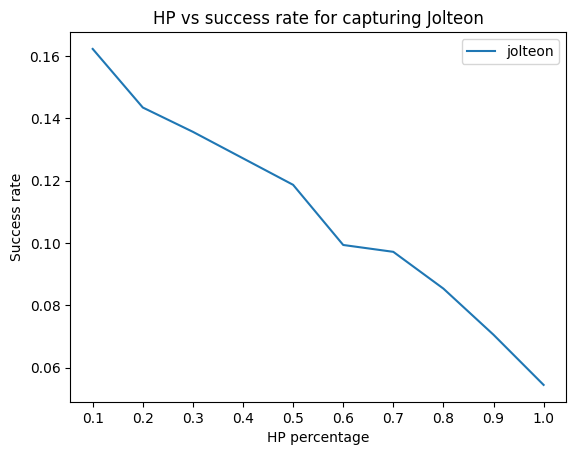

In [72]:
pokemons = ['snorlax', 'jolteon'] # Picked two pokemon to test on
success_rates_dict = {pokemon: [] for pokemon in pokemons}

hp_range = np.linspace(0.1, 1, 10) # 10% hp to 100% by steps of 10%
num_captures = 10000 # Number of catch attempts from which avg is determined for each hp

for pokemon_name in pokemons:
    for hp in hp_range:
        # Instantiate pokemon for each hp value
        pokemon = factory.create(name=pokemon_name, level=100, status=StatusEffect.NONE, hp_percentage=hp)

        # Calculate success rate (num_captures samples)
        success_count = 0
        for i in range(num_captures):
            attempt_success, _ = attempt_catch(pokemon, 'pokeball', 0.15)
            if attempt_success:
                success_count += 1
        success_rates_dict[pokemon_name].append(success_count/num_captures)
        
        """
        # Perform num_captures catch attempts and use capture_rate mean directly
        capture_rate_list = []
        for i in range(num_captures):
            _, capture_rate = attempt_catch(pokemon, 'pokeball', 0.15)
            capture_rate_list.append(capture_rate)
        
        mean = np.mean(capture_rate_list)
        success_rates_dict[pokemon_name].append(mean)
        """

    # Plot the capture rate means for each pokemon
    plt.plot(hp_range, success_rates_dict[pokemon_name], label=pokemon_name)
    plt.xlabel('HP percentage')
    plt.xticks(hp_range) 
    plt.ylabel('Success rate')
    plt.title(f'HP vs success rate for capturing {pokemon.name.capitalize()}')
    plt.legend()
    plt.show()

### c) ¿Que parametros son los que mas afectan la probabilidad de captura?

parameters

mutable
- current_hp: 1 to 100
- status_effect: poison, burn, paralysis, sleep, freeze, none
- level: 1 to 100

immutable
- type: normal, fire, water, grass, ..., fairy, none
- stats: hp, attack, defense, special_attack, special_defense, speed
- weight: 0+
- catch_rate: 0 to 255

x axis: parameter

y axis: catch rates

### okay so I really don't know if the following bit is anywhere near correct or not

### it's not normalized, i'm comparing the distribution of catch rates when i vary the various parameters

also the code is janky

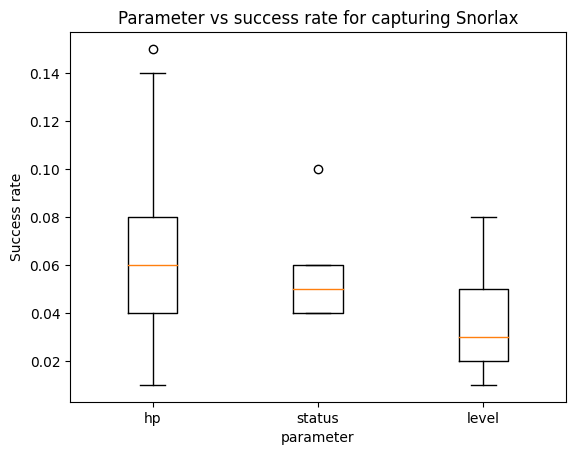

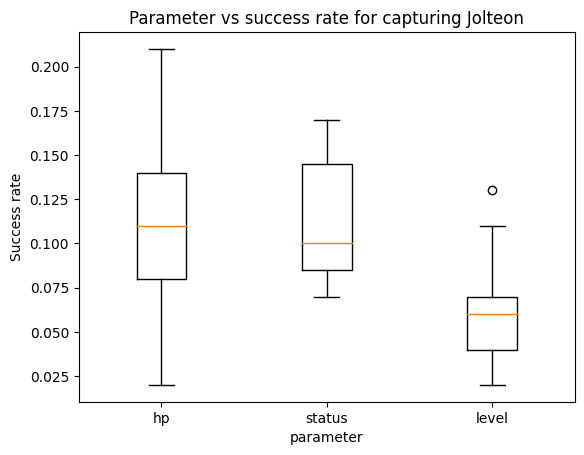

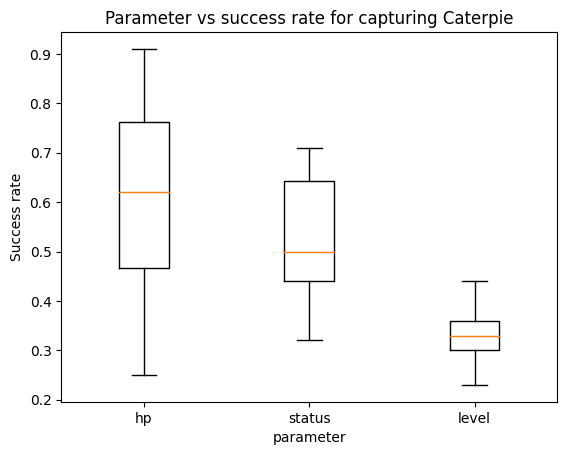

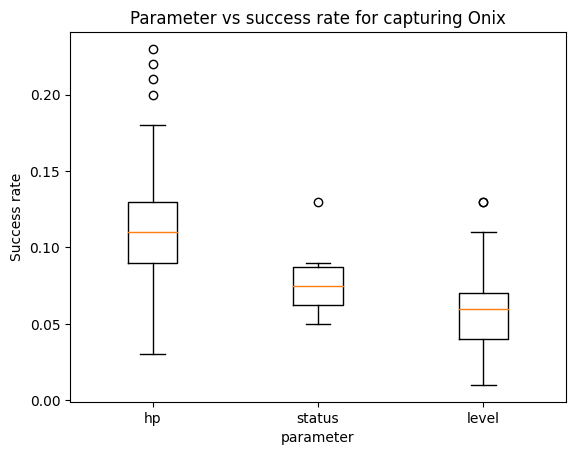

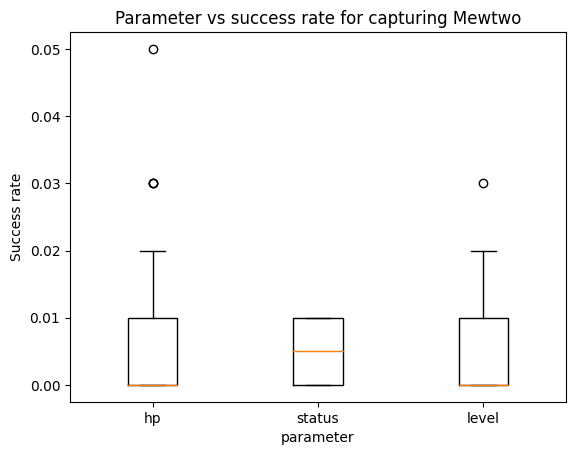

In [148]:
num_attempts = 100

hp_list = np.linspace(0.1, 1, 100)
status_effect_list = [StatusEffect.POISON, StatusEffect.BURN, StatusEffect.PARALYSIS, StatusEffect.SLEEP, StatusEffect.FREEZE, StatusEffect.NONE] 
level_list = np.linspace(1, 100, 100)

params = [hp_list, status_effect_list, level_list]

for pokemon_name in pokemonName_list:
    success_rates_dict = {param: [] for param in ["hp", "status", "level"]}
    
    for hp in hp_list:
        pokemon = factory.create(name=pokemon_name, level=100, status=StatusEffect.NONE, hp_percentage=hp)
        
        # Calculate success rate (num_attempts samples)
        success_count = 0
        for i in range(num_attempts):
            attempt_success, _ = attempt_catch(pokemon, 'pokeball', 0.15)
            if attempt_success:
                success_count += 1
        success_rates_dict["hp"].append(success_count/num_attempts)
           
    for status_effect in status_effect_list:
        pokemon = factory.create(name=pokemon_name, level=100, status=status_effect, hp_percentage=1)
        
        # Calculate success rate (num_attempts samples)
        success_count = 0
        for i in range(num_attempts):
            attempt_success, _ = attempt_catch(pokemon, 'pokeball', 0.15)
            if attempt_success:
                success_count += 1
        success_rates_dict["status"].append(success_count/num_attempts)

    
    for level in level_list: 
        pokemon = factory.create(name=pokemon_name, level=level, status=StatusEffect.NONE, hp_percentage=1)
        
        # Calculate success rate (num_attempts samples)
        success_count = 0
        for i in range(num_attempts):
            attempt_success, _ = attempt_catch(pokemon, 'pokeball', 0.15)
            if attempt_success:
                success_count += 1
        success_rates_dict["level"].append(success_count/num_attempts)

    # Boxplot
    plt.boxplot([np.array([success_rates_dict["hp"]])[0], np.array([success_rates_dict["status"]])[0], np.array([success_rates_dict["level"]])[0]])
    plt.xticks([1, 2, 3], ['hp', 'status', 'level'])
    plt.xlabel('parameter')
    plt.ylabel('Success rate')
    plt.title(f'Parameter vs success rate for capturing {pokemon.name.capitalize()}')
    plt.show()

### d) Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinacion de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?

In [197]:
pokemon_names = ['snorlax', 'jolteon'] # Picked two pokemon to test on
hp_list = np.linspace(0.1, 1, 10)
status_effect_list = [StatusEffect.POISON, StatusEffect.BURN, StatusEffect.PARALYSIS, StatusEffect.SLEEP, StatusEffect.FREEZE, StatusEffect.NONE] 
level_list = np.linspace(10, 100, 10)
pokeball_list = ['Pokeball', 'Ultraball', 'FastBall', 'HeavyBall']

success_table = np.empty((0,6))

def success_rate(pokemon, pokeball, num_attempts=100):
    """
    Calculate success rate over num_attempts attempts (%)
    """
    success_count = 0
    for i in range(num_attempts):
        attempt_success, _ = attempt_catch(pokemon, 'pokeball', 0.15)
        if attempt_success:
            success_count += 1
    return success_count/num_attempts

for pokemon_name in pokemon_names:
    for hp in hp_list:
        for level in level_list:
            for status_effect in status_effect_list:
                for pokeball in pokeball_list:
                    pokemon = factory.create(name=pokemon_name, \
                                             level=level, \
                                             status=status_effect, \
                                             hp_percentage=hp)
                    rate = success_rate(pokemon, pokeball, 300)
                    success_table = np.append(success_table, np.array([[pokemon_name, rate, hp, level, status_effect, pokeball]]), axis=0)
print(success_table)

[['snorlax' 0.12 0.1 10.0 <StatusEffect.POISON: ('poison', 1.5)>
  'Pokeball']
 ['snorlax' 0.13333333333333333 0.1 10.0
  <StatusEffect.POISON: ('poison', 1.5)> 'Ultraball']
 ['snorlax' 0.14 0.1 10.0 <StatusEffect.POISON: ('poison', 1.5)>
  'FastBall']
 ...
 ['jolteon' 0.043333333333333335 1.0 100.0
  <StatusEffect.NONE: ('none', 1)> 'Ultraball']
 ['jolteon' 0.056666666666666664 1.0 100.0
  <StatusEffect.NONE: ('none', 1)> 'FastBall']
 ['jolteon' 0.05 1.0 100.0 <StatusEffect.NONE: ('none', 1)> 'HeavyBall']]


In [198]:
max_index = np.argmax(success_table[:, 1])
print(max_index)

res = success_table[max_index]
print('pokemon:', res[0])
print('rate:', res[1])
print('hp:', res[2])
print('level:', res[3])
print('status_effect:', res[4])
print('pokeball:', res[5])

2412
pokemon: jolteon
rate: 0.3933333333333333
hp: 0.1
level: 10.0
status_effect: StatusEffect.SLEEP
pokeball: Pokeball


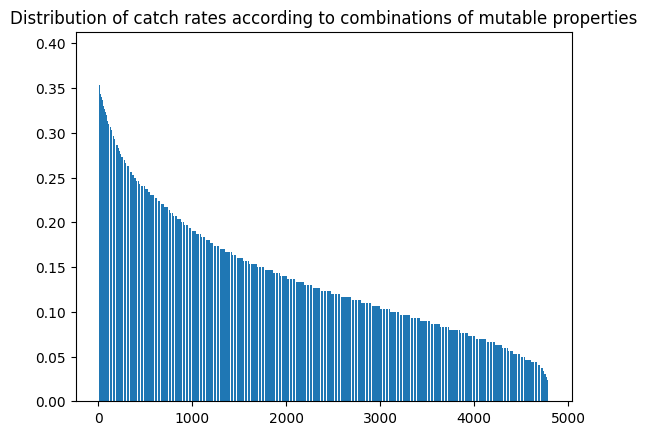

In [199]:
rates = -np.sort(-success_table[:, 1])
plt.bar(range(len(rates)), rates)
plt.title('Distribution of catch rates according to combinations of mutable properties');